# The World's Hardest Game

Esse projeto realizou a implementação de um algoritmo genético para resolução da primeira fase do jogo ["The World's Hardest Game (WGH)"](https://www.coolmathgames.com/0-worlds-hardest-game), produzido pelo Flash Game Studio. O jogo é composto por um jogador que tem como objetivo sair de uma área inicial e chegar em uma área final sem que colida com algum dos inimigos que realizam movimentos repetidamente na área central. Especificamente, a primeira fase é composta por quatro inimigos que realizam movimentos em relação ao eixo x, como mostra a Figura 1 abaixo.  Toda vez que um jogador colide com algum inimigo, sua posição é restaurada para o ponto inicial. Um jogador pode realizar oito diferentes ações: ir para cima, para baixo, para direita, para esquerda e para cada uma das quatro diagonais.

<img src="figs/whg-f1.jpg" alt="whg"/>
<center>Figura 1 - The World's Hardest Game.</center>

##### Implementação

Todo o projeto foi implementado em Python. O jogo foi implementado através da biblioteca Pygame. Todo código desenvolvido está disponível no [GitHub](https://github.com/gabrielpreviato/hardest-pygame-ever), assim como as instruções para execução do jogo e do algoritmo genético.

## Modelagem

#### Cromossomo:

Cada cromossomo representa a sequência de ações realizadas por um indíviduo. Assim como no jogo original, cada indivíduo pode realizar oito ações diferentes: ir para cima, para baixo, para direita, para esquerda e para qualquer uma das quatro diagonais. O tamanho do cromossomo é extendido iterativamente, conforme o indivíduo vai se afastando da área inicial. Tal estratégia tem como objetivo evitar processamento de ações que muito provavelmente não chegariam a ser executadas nas gerações inicias, já que o indivíduo tende a colidir antes de completar todas as ações previstas pelo cromossomo, além de evitar que os caminhos encontrados pelos indivíduos contenham muitas ações e pouco deslocamento. 

Na criação dos cromossomos da população inicial, bem como nos métodos de mutação desenvolvidos, cada uma das ações pode ser repetida sequecialmente um número de vezes entre $1$ e metade do tamanho atual do cromossomo, com o objetivo de evitar que o indivíduo faça muitas ações com pouco deslocamento.

### Fitness Function

A implementação da função fitness requeriu a criação de dois pontos na área inicial e final do jogo, como indica a Figura 2. O jogador começa o jogo no centro da área inicial (área verde a esquerda), deve ir até a área principal do jogo (área em cinza), e chegar na área final (área verde a direita). A função fitness do indivíduo $i$ é dada pela seguinte expressão:

$ f(i) = best\_position(i) + n\_actions(i) + poison(i) $, tal que:

- $ best\_position(i) $ corresponde a menor distância $dist(i)$ que o jogador ficou do objetivo durante uma sequência de ações. A distância $dist(i)$ é calculada da seguinte forma:

    - distância euclidiana entre a posição atual do jogador + distância do ponto de início até o ponto final, se jogador está na área inicial;
    - distância euclidiana entre a posição atual do jogador e o ponto final, se o jogador está na área principal;
    - zero, caso o jogador esteja na área final.
    
- $ n\_actions $ corresponde ao índice da ação na sequência de ações que resultou na melhor posição $best\_position(i)$, isto é, o número de ações que o indivíduo realizou para chegar na melhor posição.
    
- $ poison(i) $ é um parâmetro que indica por quantas ações o jogador ficou na área inicial (área envenenada). Inicialmente, $poison(i) = 0$, e a cada movimento realizado que faz que a posição resultante do jogador esteja na área inicial, $poison(i)$ é incrementado em um. Similarmente, a cada movimento realizado que faz a posição resultante do jogador esteja em uma área que não a inicial, $poison(i)$ é decrementado em um.

Tanto o cálculo da distância utilizada para se obter o valor do $best\_position(i)$ quanto o parâmetro $poison(i)$ têm como objetivo fazer o indivíduo ir rapidamente para a área principal do jogo e evitar que se movimentem por muito tempo dentro da área inicial. 

<img src="figs/whg.png" alt="whg"/>
<center>Figura 2: Áreas e pontos criados para a simulação do jogo e execução do algoritmo genético.</center>

### Testes Realizados

Os experimentos foram baseados em duas simulações principais, descritas abaixo. Ambas as simulações foram executadas para populações com tamanho $200$ e $500$. Para cada execução, foi criada uma população inicial de forma aleatória e cada indivíduo dessa população executa a sequência de ações de seu cromossomo até acabarem ou até que colidam com algum inimigo. Cada cenário de cada simulação, foi executado nove vezes.

#### Simulação 1:
- Critério de parada dado pelo número de gerações (no máximo $500$ gerações) ou até que $50\%$ da população vença o jogo.
- Crossover single-point, tal que o ponto do crossover entre dois indivíduos $i, j$ é calculado como o valor mínimo entre $n\_actions(i)$ e $n\_actions(j)$. É válido ressaltar que, como a ordem das ações interfere na solução, o crossover mantém a sequência do cromossomo até o ponto do crossover escolhido e troca a sequência do cromossomo a partir de tal ponto entre os dois indivíduos.
- A mutação é realizada alterando uma sequência de ações a partir de um ponto $x$ do cromossomo com uma ação escolhida de forma aleatória. O ponto de mutação é escolhido aleatóriamente de forma próxima (igual ou menor) ao ponto $n\_actions(i)$, tal que $i$ é o indivíduo pai daquele cromossomo.
- Tamanho inicial do cromossomo igual a 15 e extendido em 10 ações a cada cinco gerações ou até que o melhor indivíduo $i$ possua $n\_actions(i)$ igual ao tamanho atual do cromossomo, ou seja, a realização da sequência completa de ações do cromossomo levou o melhor indivíduo a melhor posição (o melhor indivíduo é o indíviduo $i$ com a melhor $best\_position(i)$ de uma determinada geração).
- A seleção de indivíduos foi realizada de duas formas:
    - Método 1: Seleção aleatória com pesos $p$ para cada indíviduo $i$, tal que $p(i) = fitness(i)/fitness\_total\_população$;
    - Método 2: Roullete;
- Cenário 1:
    - Substituição da população com o método Steady State, tal que, $30\%$ da população é selecionada para realizar o crossover e criar novos indíviduos e $70\%$ da população são clones de seus pais. Ambas as seleções são realizadas pelo método 1. Nesse cenário, os $70\%$ dos indivíduos que foram gerados a partir de clonagem sofrem mutação.
- Cenário 2:
    - A nova geração é completamente gerada a partir de clonagem de seus pais. Cada pai é selecionado através do método 2. Nesse cenário todos os indivíduos sofrem mutação.
    

#### Simulação 2:
- Critério de parada dado pelo número de gerações (no máximo $2000$ gerações) ou até que $50\%$ da população vença o jogo.
- Crossover single-point, tal que o ponto de crossover entre dois indivíduos é proporcional à ordem de seleção, ao tamanho do cromossomo e a atual geração (mais explicações abaixo)
- A mutação é realizada a partir do ponto o qual o pai morreu (caso o gene esteja no filho), a fim de gerar uma nova sequência que tente evitar a morte na próxima geração. A mutação seleciona valores de genes aleatórios para os substituídos.
- Tamanho inicial do cromossomo igual a 30 e extendido em 20 ações a cada 5 gerações, até o ponto em que o cromossomo atinge o tamanho máximo de 900 genes. 
- A seleção de indivíduos for realizada da seguinte forma:
    - Todos os pais são selecionados, a fim de garantir um alto nível de variabilidade
    - A lista de cromossomos é reordenada para que os cromossomos com melhor fitness sejam selecionados primeiro para a reprodução
    - A reordenação é feita a partir de um 'shuffle' com pesos, sendo que os cromossomos com melhor fitness tem maior probabilidade de serem escolhidos. O valor da pior fitness (valor mais alto) é selecionado, e o peso de cada cromossomo é dado por $max\_fitness - fitness$, logo os melhores terão maior peso. A função $weighted\_shuffle()$ se encontra em $ga\_lib.py$
- O crossover é feito entre os cromossomos consecutivos tirados da seleção. Por exemplo, cromossomo $0$ faz crossover com o cromossomo $1$, cromossomo $2$ faz crossover com o cromossomo $3$, e assim por diante. 
    - O ponto de crossover é variável e depende da ordem de seleção. Quanto melhor for a posição de seleção dos pais, mais próximo do fim do cromossomo o ponto é selecionado, pois assume que os pais tem maior probabilidade de morte no fim do cromossomo. Esse ponto é ajustado para mais à esquerda do cromossomo, em direção ao começo, de seleção em seleção de pares, através da variável $crossover\_pos$. Quanto pior é a posição de escolha dos pais, maior é a troca de genes entre cromossomos para forçar uma maior variabilidade no caminho. A variável mencionada anteriormente é também incrementada a cada $5$ gerações, para acompanhar o aumento do tamanho do cromossomo.
- Após o crossover, os filhos gerados sofrem mutação em uma taxa de $30\%$, seguindo o método descrito anteriormente.






### Métricas coletadas:

- Número de iterações realizadas;
- Número de vencedores;
- Tamanho final do cromossomo;
- Número de ações da melhor solução encontrada (indivíduo com melhor *fitness*).

Além disso, em cada execução, foram armazenados o estado do indíviduo com a melhor *fitness* e foram gerados dois gráficos que representam a *fitness* média e máxima de cada população. Todos os resultados dos testes realizados encontram-se disponíveis em https://drive.google.com/drive/folders/16mDRKKRitvKi_hKIn5G1Zm6R_L17K6KM?usp=sharing.

## Análises

### Simulação 1

As tabelas e gráficos abaixo mostram que ambos os cenários da Simulação 1 obtiveram resultados extremamente semelhantes, mesmo quando comparados os dois tamanho de população (200 e 500)

#### Cenário 1

In [1]:
import pandas as pd

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

cols = [0, 1, 3, 4, 5, 9]

# importa o arquivo e guarda em um dataframe do Pandas
df_200 = pd.read_csv('Tests/simulation_one_200.csv', sep=',', index_col=None, usecols=cols) 
df_500 = pd.read_csv('Tests/simulation_one_500.csv', sep=',', index_col=None, usecols=cols) 

frames = [df_200, df_500]

df = pd.concat(frames)

df_steady = df.loc[df['type'] == "steady"]
df_steady

,type,population_size,iterations,winners,final_state_size,best_number_actions
0,steady,200,151,148,315,314
2,steady,200,151,103,315,314
4,steady,200,152,117,315,314
6,steady,200,148,111,305,304
8,steady,200,149,145,305,304
10,steady,200,161,113,335,334
12,steady,200,153,100,315,314
14,steady,200,151,110,315,314
16,steady,200,148,102,305,304
0,steady,500,151,264,315,314


#### Cenário 2

In [2]:
df_roulette = df.loc[df['type'] == "roulette"]
df_roulette

,type,population_size,iterations,winners,final_state_size,best_number_actions
1,roulette,200,154,133,315,314
3,roulette,200,158,115,325,317
5,roulette,200,148,116,305,304
7,roulette,200,159,120,325,324
9,roulette,200,158,100,325,324
11,roulette,200,151,128,315,304
13,roulette,200,160,100,335,324
15,roulette,200,150,120,315,304
17,roulette,200,154,135,315,314
1,roulette,500,152,369,315,314


In [3]:
df_mean = df.groupby(["type", "population_size"]).mean().round(2)
df_mean

iterations  winners  final_state_size  \
type     population_size                                          
roulette 200                  154.67   118.56            319.44   
         500                  149.67   310.33            309.44   
steady   200                  151.56   116.56            313.89   
         500                  150.56   307.00            312.78   

                          best_number_actions  
type     population_size                       
roulette 200                           314.33  
         500                           307.33  
steady   200                           312.89  
         500                           310.67

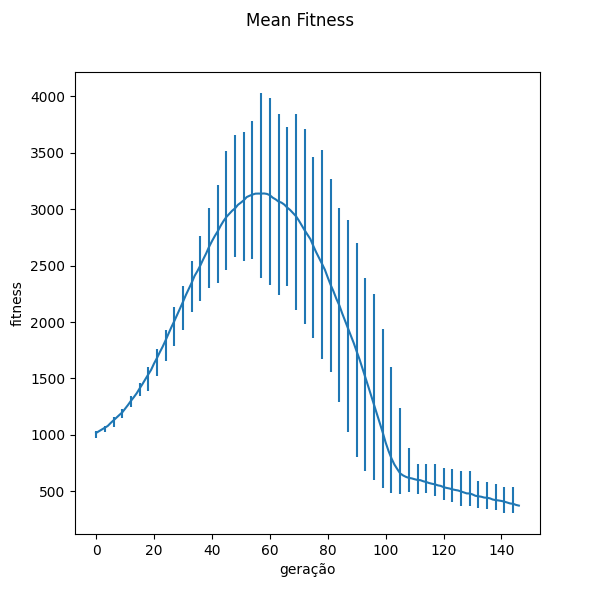

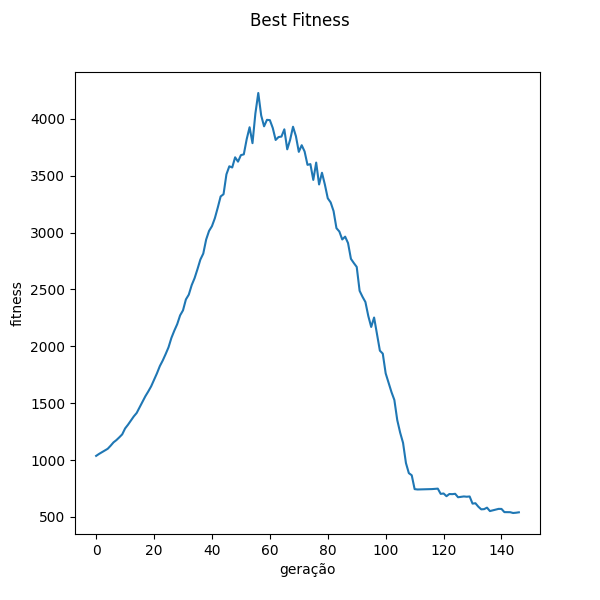

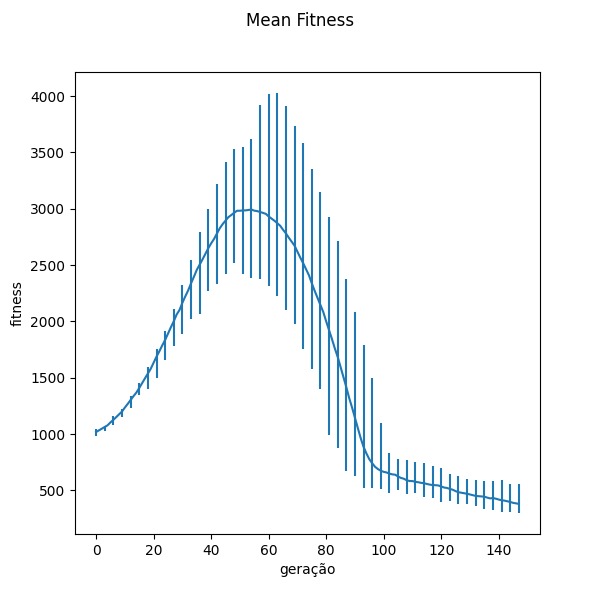

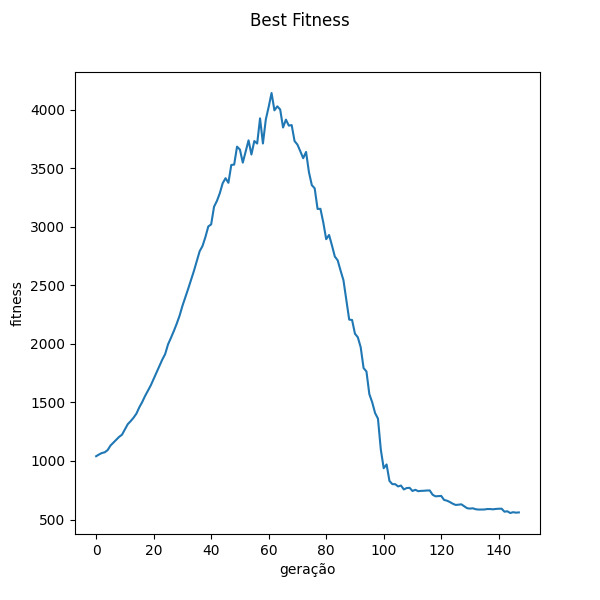

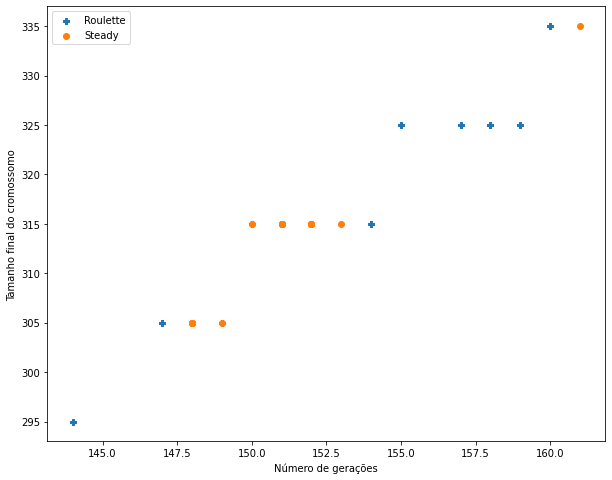

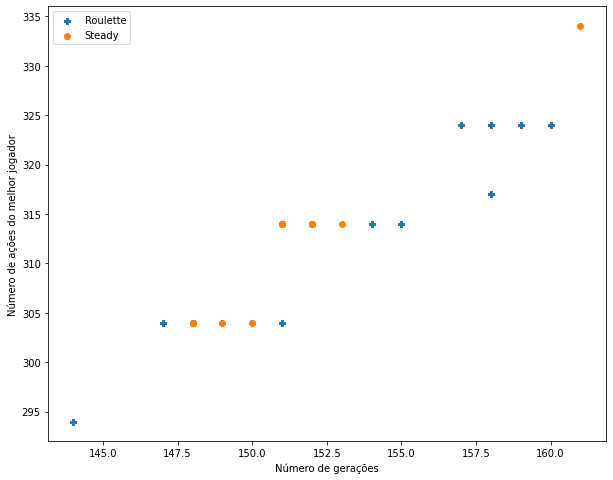

In [4]:
def make_plot(feature, ylabel):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.scatter(df_roulette['iterations'], df_roulette[feature], label="Roulette", marker='P')
    ax.scatter(df_steady['iterations'], df_steady[feature], label="Steady", marker='o')
    plt.ylabel(ylabel)
    plt.xlabel('Número de gerações')
    ax.legend()
    plt.xticks()
    plt.show()

make_plot('final_state_size', 'Tamanho final do cromossomo')
make_plot('best_number_actions', 'Número de ações do melhor jogador')

### Simulação 2

In [5]:
# importa o arquivo e guarda em um dataframe do Pandas
#df = pd.read_csv('Tests/    .csv', sep=',', index_col=None, usecols=[0, 1, 3, 4, 5, 9]) 

## Conclusão

Durante o desenvolvimento do trabalho, se observou que o desempenho do algoritmo genético era melhor quando os indíviduos de uma nova geração eram criados majoritariamente a partir de clonagem e mutação de seus pais, ao invés de aplicar o crossover. Tal comportamento, deve-se ao fato da ordem das ações interferirem no desempenho do jogador e a preservação da melhor sequência de ações de um jogador ser indispensável para o algoritmo encontrar a solução. Diante deste cenário, algumas mudanças nos métodos tradicionais do crossover foram aplicadas, como por exemplo, a modificação do crossover, mantendo a sequência inicial de ações dos indivíduos pais nos novos indivíduos filhos. Entretanto, pela Simulação 2, foi possível observar que mesmo com tal modificação, ao colocar uma taxa de crossover alta, a solução não foi encontrada dentro do esperado.

A principal dificuldade encontrada no desenvolvimento do algoritmo genético foi fazer os indivíduos saírem rapidamente da área inicial e entrarem na área principal do jogo. Uma função fitness simples que relaciona somente a distância entre a posição atual do jogador e algum ponto da área objetivo não foi suficiente para resolver o problema, já que tal função não induzia os jogadores a saírem da área inicial. Assim, foram feitas as estratégias de criação de dois pontos na área inicial e final e de adicionar um valor de *poison* na área inicial para, primeiramente, induzir o jogador a sair da área inicial e somente então ir em direção a área objetivo. Ambas as estratégias apresentaram bom resultado nos cenários com baixa taxa de crossover, que preservam a melhor sequência de ações.